<a href="https://colab.research.google.com/github/Haseeb227/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# hiding all warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing all the important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC

In [ ]:
# Connecting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv")


In [ ]:
#Shape of the data
df.shape

(3390, 17)

In [ ]:
#Initial inspection of data
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Checking for null values
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Education, cigsPerDay , totchol, and glucose have null values

In [ ]:
# Unique values in education column
df['education'].unique()

array([ 2.,  4.,  1.,  3., nan])

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

0

# **EDA**

**Univariate Analysis**

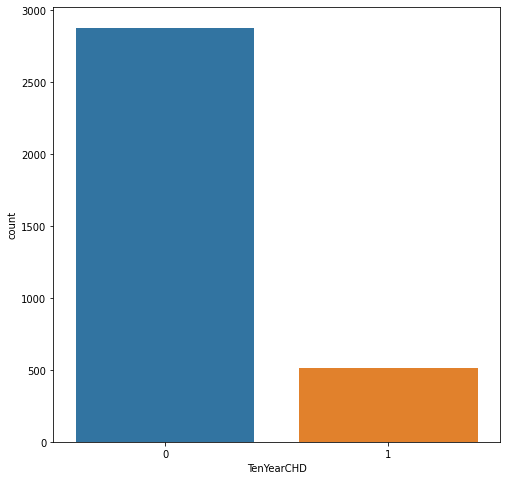

In [ ]:
# Plotting the countplot for dependent variable
dep_variable = 'TenYearCHD'
plt.figure(figsize = (8,8))
sbn.countplot(df[dep_variable])
plt.show()

In [ ]:
# Vlue counts for Dependent variable
df[dep_variable].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

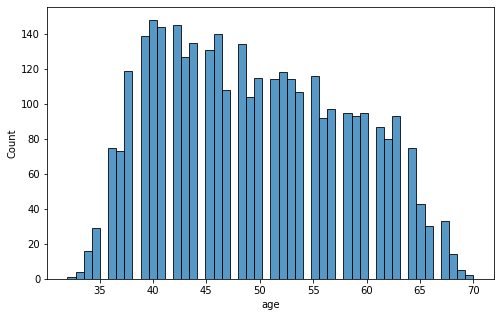

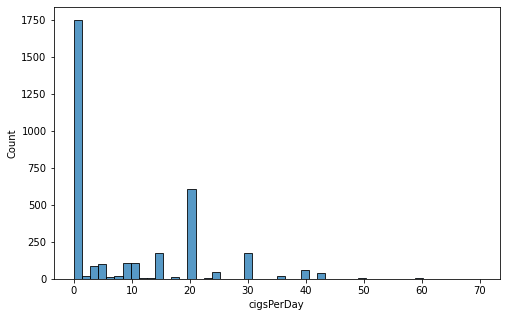

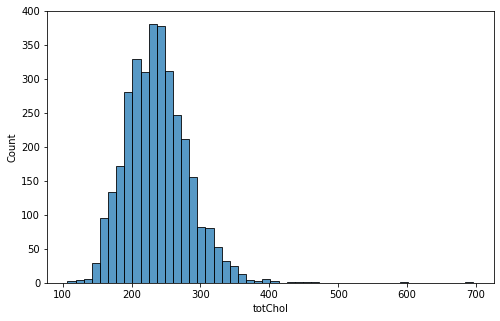

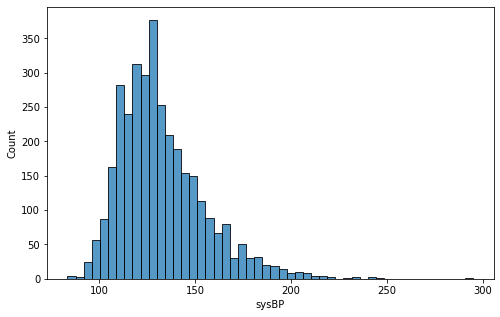

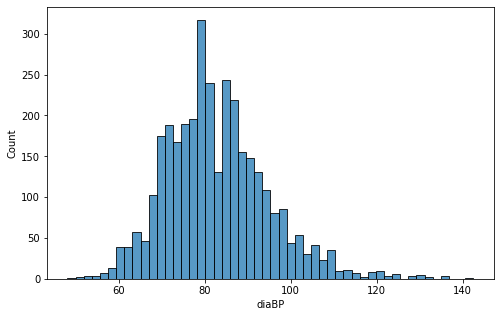

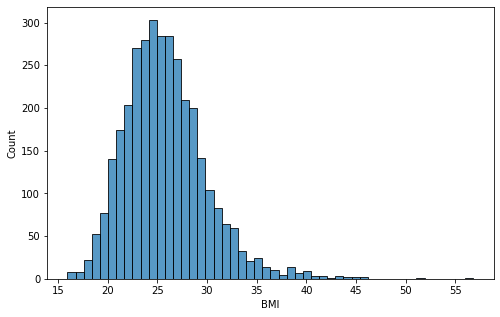

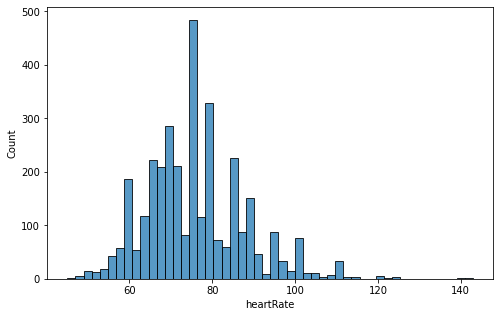

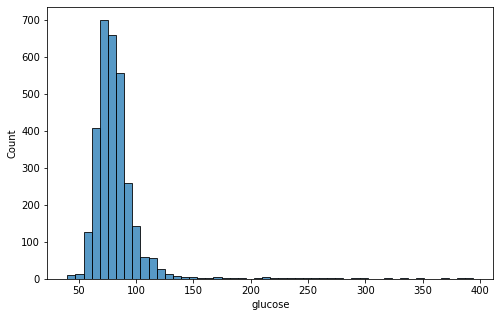

In [ ]:
# Plotting distribution of values of cts numerical features
cts_features = ['id','age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
for col in cts_features[1:]:
  plt.figure(figsize = (8,5))
  sbn.histplot(df[col], bins = 50)

Most of the numerical features are positively skewed.

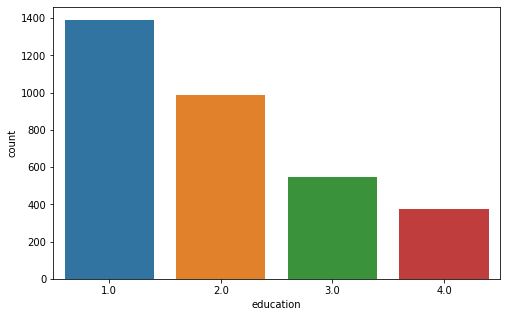

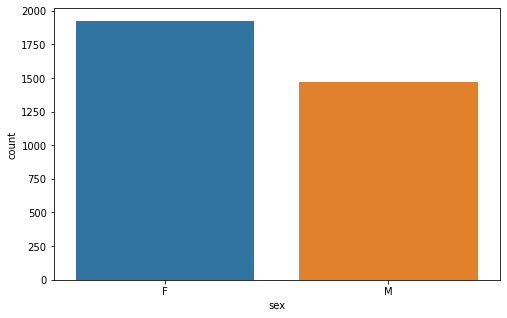

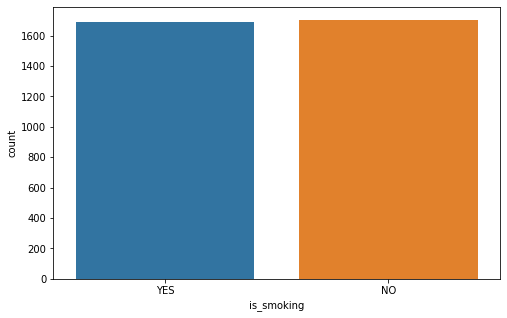

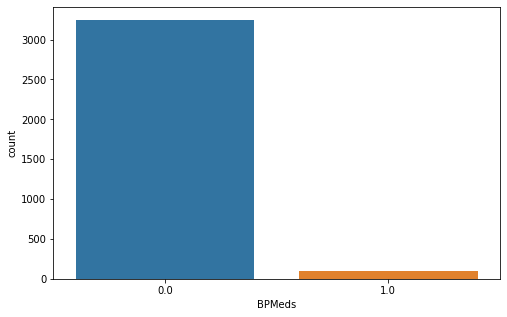

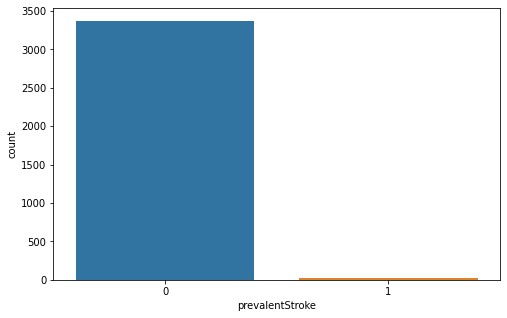

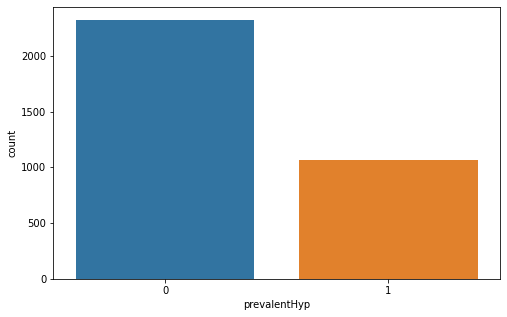

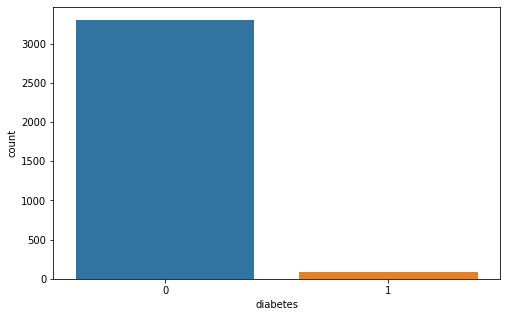

In [ ]:
# plotting the count plot of categorical features
cat_features = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
for col in cat_features:
  plt.figure(figsize = (8,5))
  sbn.countplot(df[col])
  plt.show()

Input features like 'diabetes', 'prevalentStroke' and 'BPMeds' are highly imbalanced.

 **Bivariate analysis**



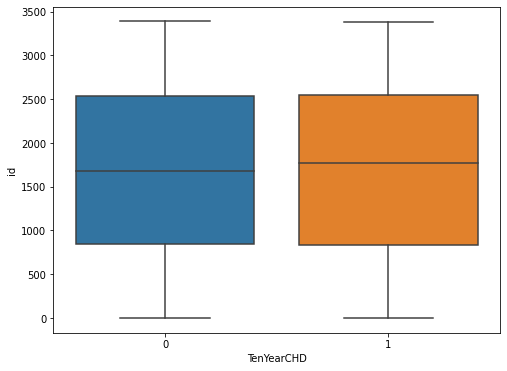

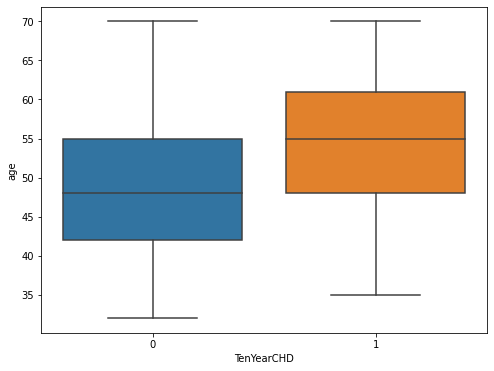

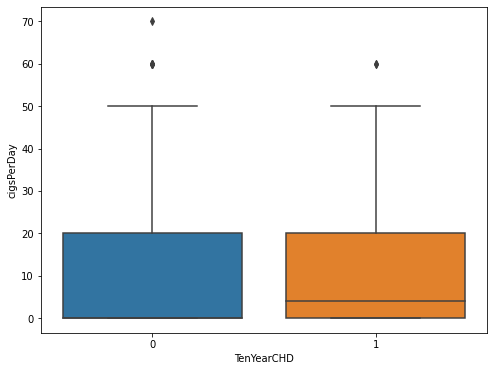

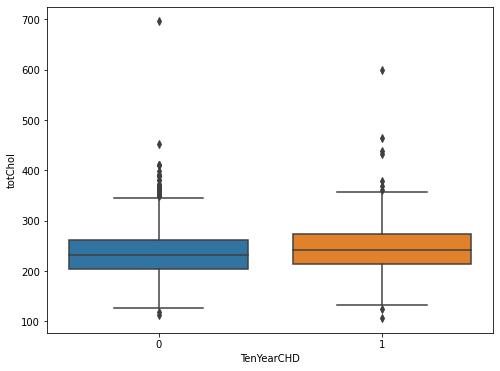

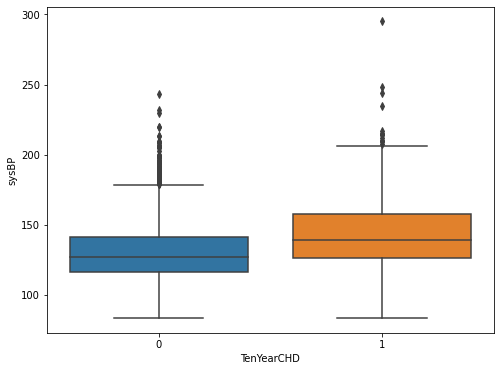

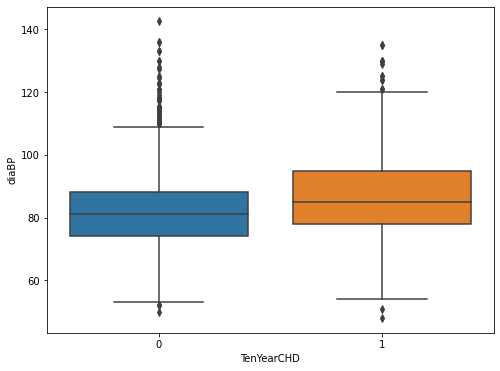

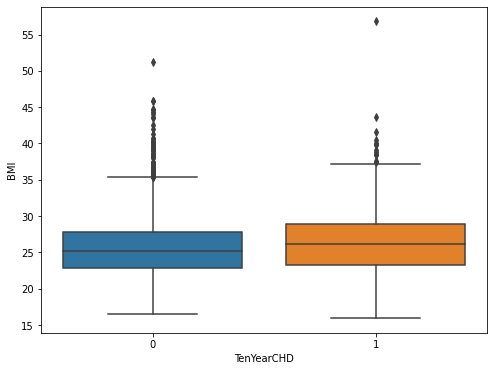

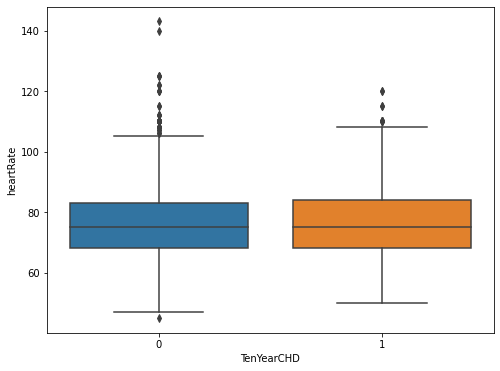

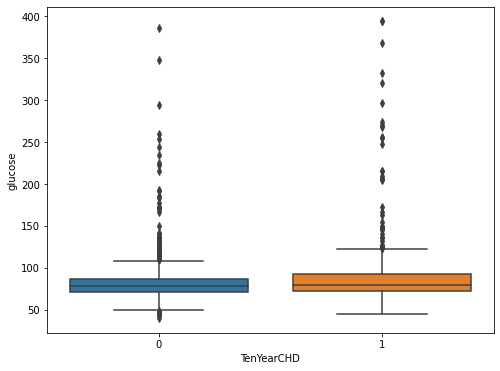

In [ ]:
# plotting boxplot for continous features for each class of dependent feature.
for col in cts_features:
  plt.figure(figsize = (8,6))
  sbn.boxplot(x = df[dep_variable],y = df[col])

Average value of 'age', 'Cigsperday', 'SysBP', 'DiaBP' and 'BMI' is higher for people at risk of cardiovascular disease.

Percentage of people in each class of categorical features for each class of dependent variable.

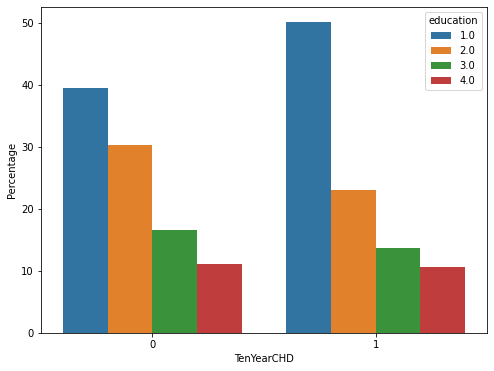

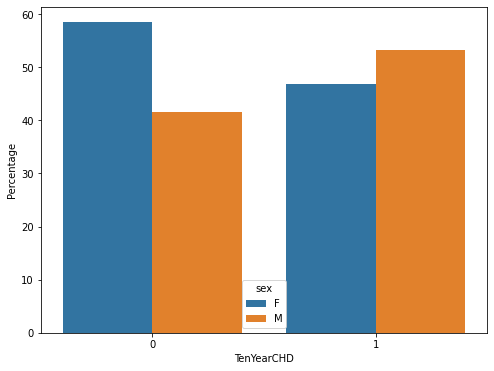

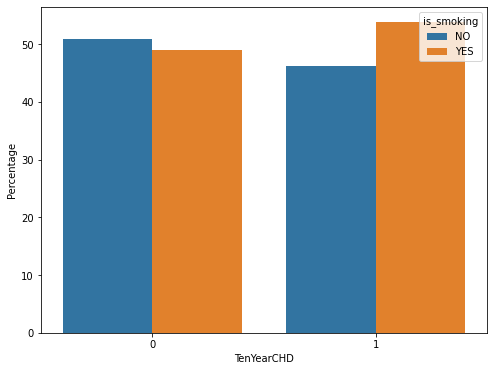

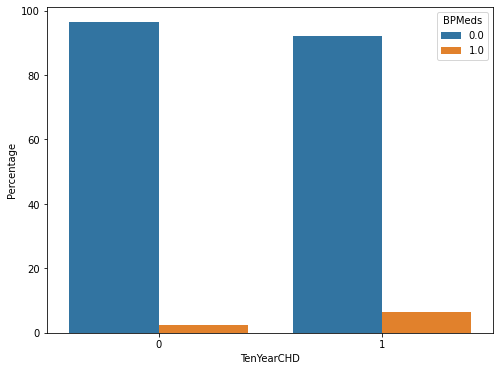

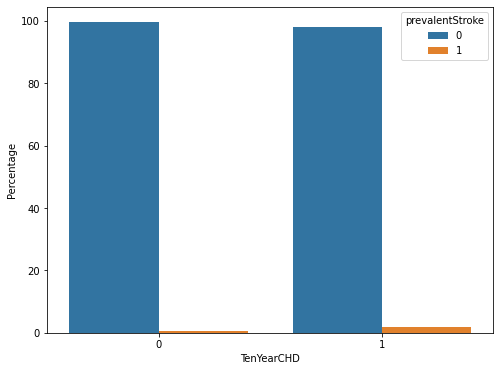

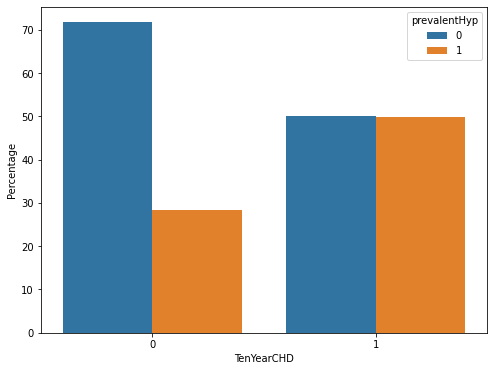

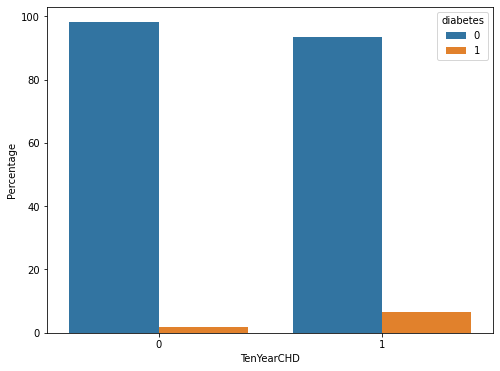

In [ ]:
# Plotting values for different categorical variables WTR to dependent variable

df_groupby = df.groupby(by = dep_variable)   # Grouping data by dependent variable
for col in cat_features:
  df_plot = pd.DataFrame((df_groupby[col].value_counts()/df_groupby['id'].count())*100).reset_index().rename(columns = {0:'Percentage'})
  # creating dataframe for each categorical variable with relative percentage.
  plt.figure(figsize = (8,6))
  sbn.barplot(x = df_plot[dep_variable], y = df_plot['Percentage'] , hue = df_plot[col])
  # plotting percentage wise barplot

(1)Percentage distribution of education level is almost similar for both high risk and low risk patients. \
 (2) More percentage of men are at high risk for getting cardiovascular disease. \
  (3) Higher percentage of people who are smoking are at high risk. \
   (4) For people at high risk of cardiovascular disease there is 50% chance that they had prevalent hypertension.



Out of people having 'diabetes', 'prevalentStroke' , 'BPMeds' how many are at risk of cardiac disease.

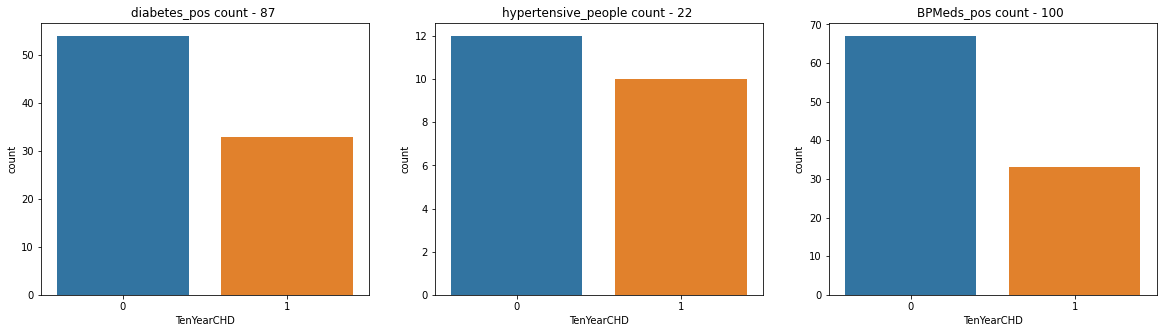

In [ ]:
# Plotting for different disease conditions

diabetes_pos = df[df['diabetes'] == 1]                # creating dataset for diabetes positive people.
hypertensive_people = df[df['prevalentStroke'] == 1]  # creating dataset for hypertensive people.
BPMeds_pos = df[df['BPMeds'] == 1]                    # creatinf dataset for people taking BP medicines.

# plotting countplot
fig, ax = plt.subplots(1,3,figsize = (20,5))
i = 0
for data_set in ['diabetes_pos','hypertensive_people', 'BPMeds_pos']:
  sbn.countplot(eval(data_set)[dep_variable],ax = ax[i])
  ax[i].set_title(f"{data_set} count - {eval(data_set).shape[0]} ")
  i += 1
plt.show()

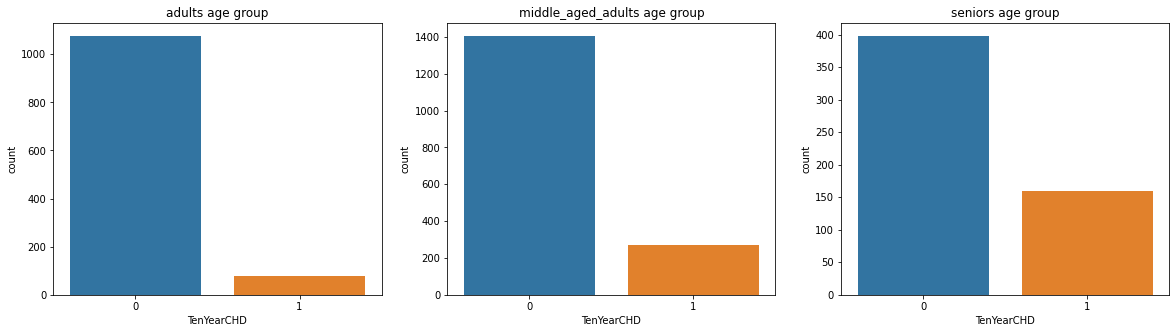

In [ ]:
#Plotting by different age group

seniors = df[df['age'] >= 60]   # Creating dataframe of senior people
adults = df[df['age'] < 45]     # Creating dataframe of adult (relatively younger) people
middle_aged_adults = df[(df['age'] >= 45) & (df['age'] < 60)]      # Creating dataframe of middle ages adult people

# Plotting countplot of disease risk for each age group
fig, ax = plt.subplots(1,3,figsize = (20,5))
i = 0
for data_set in ['adults','middle_aged_adults','seniors']:
  sbn.countplot(eval(data_set)[dep_variable],ax = ax[i])
  ax[i].set_title(f"{data_set} age group")
  i += 1
  
plt.show()

Senior age groups (> 59 years) are relatively at much higher risk for cardiovascular disease and adults (>= 32 but < 45 years) are relatively at lowest risk.

**Multivariate analysis**

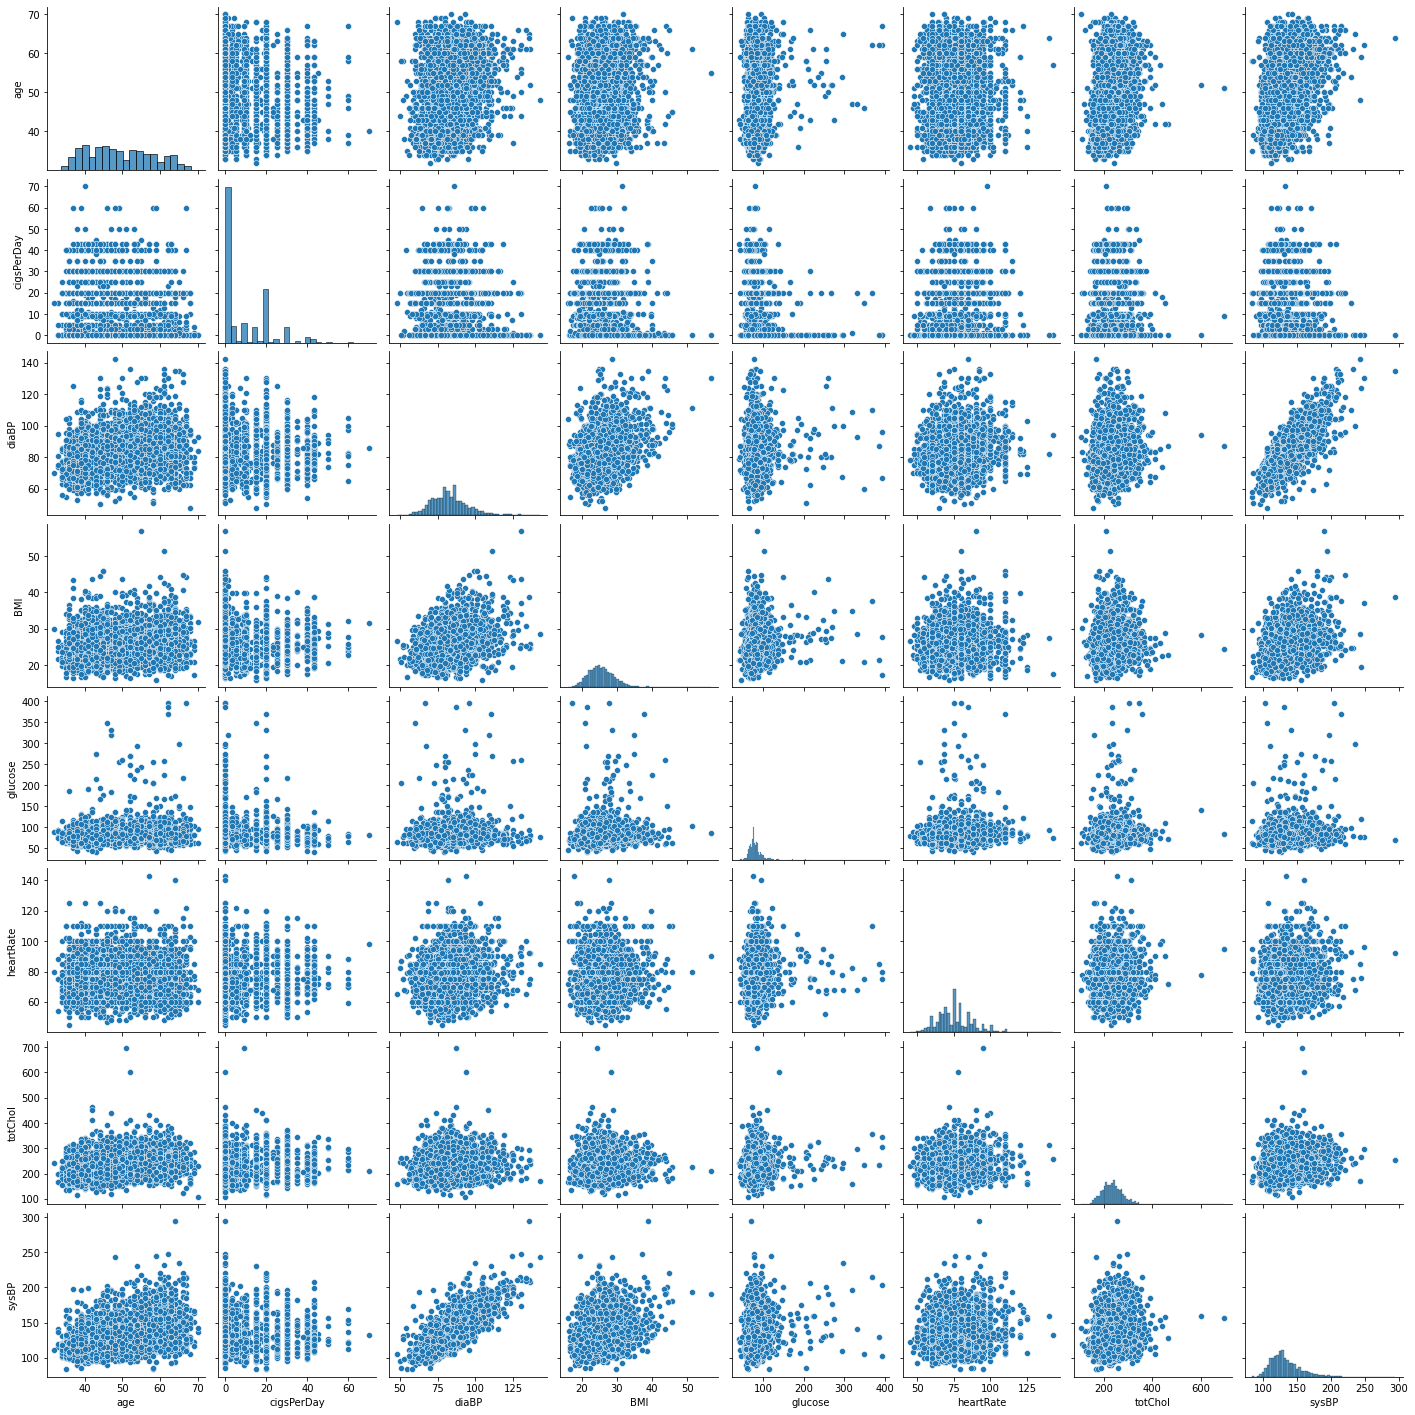

In [ ]:
# Plotting pair plot for numerical variables 
num_features = list(set(cts_features)-{'id'})   # removing id variable
num_df = df[num_features]
sbn.pairplot(num_df)
plt.show()

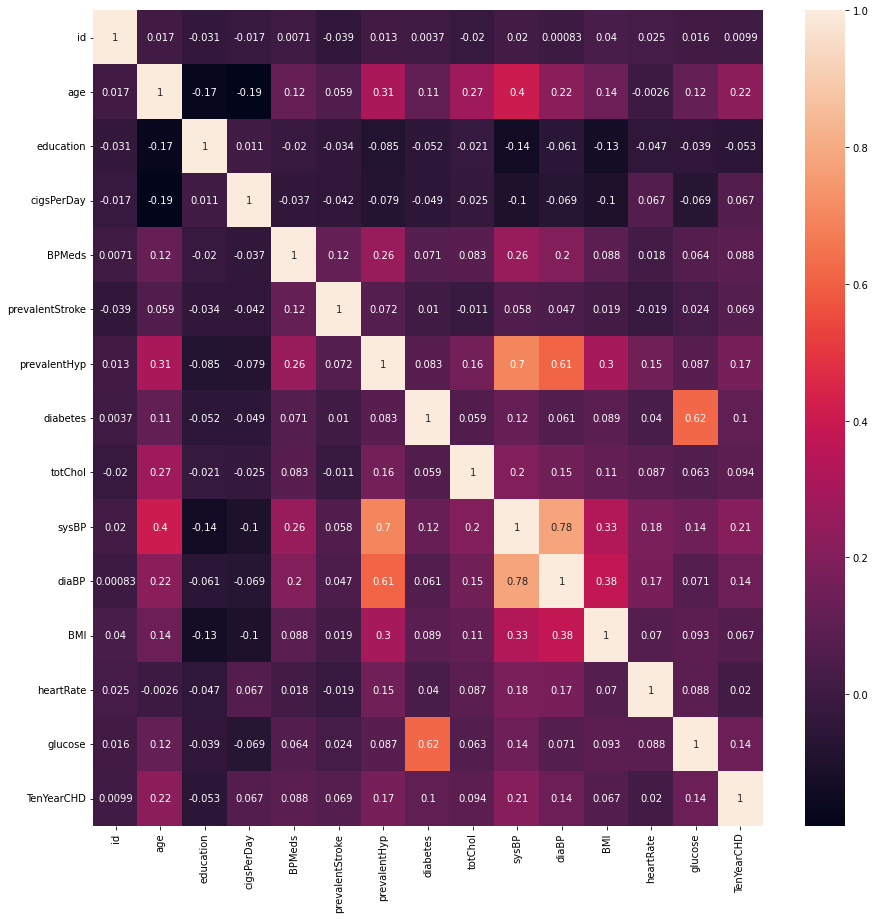

In [ ]:
# Checking correlation of each numerical feature
plt.figure(figsize = (15,15))
df_corr = df.corr()
sbn.heatmap(df_corr, annot = True)

(1) 'sysBP' and 'diaBP' are highly correlated with 0.78 correlation. \
 (2) 'glucose' and 'diabetes' are also slighly correlated with 0.62 correlation.\
  (3) 'sysBP' and 'prevalentHyp' are 0.7 correlated. \
   (4) 'diaBP' and 'prevalentHyp' are also 0.61 correlated.

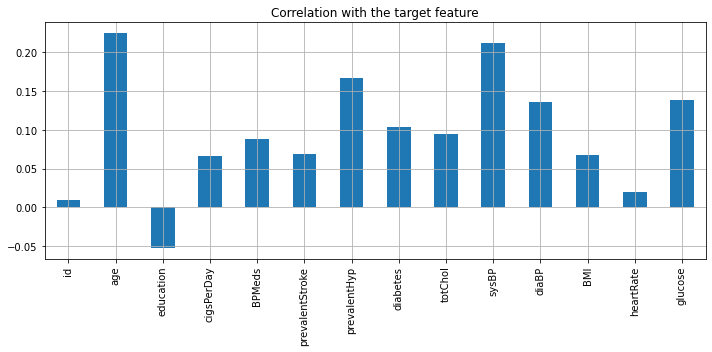

In [ ]:
# plotting correaltion with dependent feature

df.drop(dep_variable, axis=1).corrwith(df[dep_variable]).plot(kind='bar', grid=True, figsize=(10, 5), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

No feature is strongly correlated with the dependent variable.

# **Splitting data into train and test sets.**

In [ ]:
y = df[dep_variable]                       # target variable
x = df.drop(columns = [dep_variable])      # independent features
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

We have splitted data into train and test before feature engineering to avoid any kind of data leakage.

# **Feature Engineering**

**Labelling the object type categorical feature.**

In [ ]:
x_train.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2134,2134,54,1.0,F,NO,0.0,0.0,0,0,0,272.0,146.0,95.0,23.66,72.0,80.0
1161,1161,37,2.0,M,YES,9.0,0.0,0,0,0,237.0,102.0,72.0,19.68,67.0,83.0
137,137,39,1.0,M,YES,43.0,0.0,0,1,0,291.0,177.5,100.0,25.74,67.0,91.0
2170,2170,55,1.0,F,NO,0.0,0.0,0,0,0,225.0,136.5,85.5,20.56,60.0,90.0
2876,2876,59,2.0,M,NO,0.0,0.0,0,0,0,237.0,131.5,84.0,24.17,90.0,94.0


Since, 'sex' and 'is_smoking' columns are in string format. We have to encode them to numerical data type.

In [ ]:
# Function for encoding

def encoding_variables(dataset):
  ''' input - dataframe
      This function inputs the dataframe and label encode the 'sex' and 'is_smoking' column and then 
      returns the modified dataframe.'''
  dataset['sex'] = np.where(dataset['sex'] == 'M',1,0)                         # encoding 'M' as 1 and 'F' as 0 in 'sex' column
  dataset['is_smoking'] = np.where(dataset['is_smoking'] == 'YES', 1,0)        # encoding 'YES' as 1 and 'NO' as 0 in 'is_smoking' column
  return dataset

In [ ]:
x_train = encoding_variables(x_train)      # encoding features of x_train dataset
x_test = encoding_variables(x_test)        # encoding features of x_test dataset

**Removing null values.**

In [ ]:
x_train.isnull().sum()  #checking null values in training dataset

id                   0
age                  0
education           70
sex                  0
is_smoking           0
cigsPerDay          17
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             25
sysBP                0
diaBP                0
BMI                 11
heartRate            1
glucose            243
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer   # Importing SimpleImputer

def impute_null_values(dataset_train, dataset_test, cts_features, cat_features):
  ''' input - training dataset, testing dataset, numerical features, categorical features 
      This function divides the input datasets into numerical and categorical datasets then apply different imputation techniques
      based on the numerical or categorical columns after that concats the dataframes and returns them. '''


  num_feat_train = dataset_train[cts_features]   # Creating numerical train dataframe
  num_feat_test  = dataset_test[cts_features]    # Creating numerical test dataframe
  cat_feat_train = dataset_train[cat_features]   # Creating categorical train dataframe
  cat_feat_test =  dataset_test[cat_features]    # Creating categorical test dataframe

  imputer1 = SimpleImputer(strategy = 'median')  # defining imputer for numerical columns
  imputer2 = SimpleImputer(strategy = 'most_frequent') # defining imputer for categorical columns

  num_feat_train = pd.DataFrame(imputer1.fit_transform(num_feat_train))       # fitting imputer on num train dataframe
  num_feat_train.columns = cts_features
  num_feat_test = pd.DataFrame(imputer1.transform(num_feat_test))             # fitting imputer on num test dataframe
  num_feat_test.columns = cts_features

  cat_feat_train = pd.DataFrame(imputer2.fit_transform(cat_feat_train))       # fitting imputer on categorical train dataframe
  cat_feat_train.columns = cat_features
  cat_feat_test = pd.DataFrame(imputer2.transform(cat_feat_test))             # fitting imputer on categorical train dataframe
  cat_feat_test.columns = cat_features

  dataset_train = pd.concat([num_feat_train,cat_feat_train], axis = 1)       # concatenating train dataframe
  dataset_test = pd.concat([num_feat_test,cat_feat_test], axis = 1)          # concatenating test dataframe
  return dataset_train, dataset_test

In [ ]:
x_train, x_test = impute_null_values(x_train,x_test,cts_features, cat_features)   # calling null values imputing function

In [ ]:
print(f"No. of null values in x_train dataset after imputation : {x_train.isnull().sum().sum()}.")
print(f"No. of null values in x_test dataset after imputation : {x_test.isnull().sum().sum()}.")

No. of null values in x_train dataset after imputation : 0.
No. of null values in x_test dataset after imputation : 0.


**Feature Selection**

'id' feature is unique for each row and therefore not informative for model training. Hence we will drop 'id' column.

In [ ]:
def drop_column(dataset, col):
  ''' input - dataframe, column 
      This function inputs a dataframe and a column to drop from the dataframe and then
      returns the modified dataframe.'''
  dataset.drop(columns = [col], inplace = True)
  return dataset

In [ ]:
x_train = drop_column(x_train, 'id')    # dropping 'id' from x_train
x_test = drop_column(x_test, 'id')      # dropping 'id' from x_test

**Applying Chi-square test for feature selection from categorical features.**

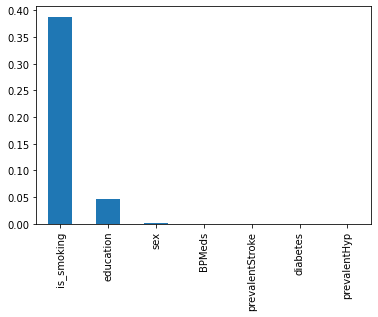

In [ ]:
from sklearn.feature_selection import chi2          # importing chi2
chi_scores = chi2(x_train[cat_features],y_train)    # calculating chi scores and corresponding p-values for only categorical features

p_values = pd.Series(chi_scores[1],index = x_train[cat_features].columns)      # creating dataframe of p-values of categorical features 
p_values.sort_values(ascending = False , inplace = True)                       # sorting dataframe

p_values.plot.bar()
plt.show()                                                            # plotting p-values bar plot

Since, p-value for 'is_smoking' is very high, so we will drop that column. \

Also one thing to notice is that, we are also given a column 'cigsPerDay' which tells us the average no. of ciggerates smoked per day by the person. If person doesn't smoke then it is zero. So, the information given in 'is_smoking' is already present in 'cigsPerDay'. Hence we can drop the 'is_smoking' column.

In [ ]:
x_train = drop_column(x_train, 'is_smoking')
x_test = drop_column(x_test, 'is_smoking')

Calculating collinearity between each independent variable

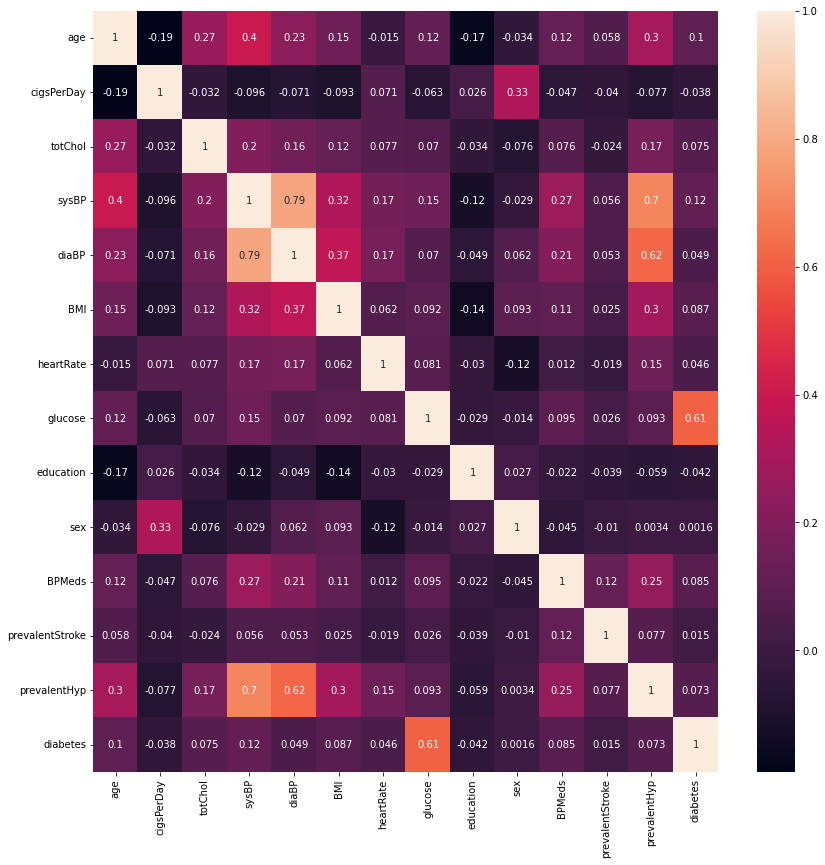

In [ ]:
x_train_corr = x_train.corr()
plt.figure(figsize = (14,14))
sbn.heatmap(x_train_corr, annot = True)

Since 'sysBP' and 'diaBP' have high correlation we will drop one of them.

In [ ]:
x_train = drop_column(x_train, 'diaBP')
x_test = drop_column(x_test, 'diaBP')

We have dropped 'diaBP' column.

**Reducing skewness**

In [ ]:
# checking skewness of cts numerical features
x_train[['age','cigsPerDay','totChol','BMI','sysBP','heartRate','glucose']].skew()

age           0.226856
cigsPerDay    1.193935
totChol       1.096632
BMI           1.040581
sysBP         1.222969
heartRate     0.660109
glucose       6.539919
dtype: float64

In [ ]:
# Applying log10 transformation to reduce skewness
np.log10(x_train[['age','cigsPerDay','totChol','BMI','sysBP','heartRate','glucose']]).skew()

age          -0.017192
cigsPerDay         NaN
totChol       0.064625
BMI           0.359000
sysBP         0.625883
heartRate     0.144671
glucose       2.390359
dtype: float64

In [ ]:
# Apply sqrt transformation to reduce skewness
np.sqrt(x_train[['age','cigsPerDay','totChol','BMI','sysBP','heartRate','glucose']]).skew()

age           0.105442
cigsPerDay    0.469819
totChol       0.497706
BMI           0.672935
sysBP         0.904974
heartRate     0.395982
glucose       4.154347
dtype: float64

In [ ]:
# Function for data transformation

def reduce_skewness(dataset):
  '''input - dataframe
    This function takes the skewed dataframe and applies transformation on them
    and returns the transformed dataframe.'''
  dataset[['totChol','sysBP','BMI','heartRate','glucose']] = np.log10(dataset[['totChol','sysBP','BMI','heartRate','glucose']])
  dataset[['cigsPerDay']] = np.sqrt(dataset[['cigsPerDay']])
  return dataset

In [ ]:
x_train = reduce_skewness(x_train)   # reducing skewness of x_train
x_test = reduce_skewness(x_test)     # reducing skewness of x_test

**Handling Imbalanced dataset**

In [ ]:
y_train.value_counts()

0    2305
1     407
Name: TenYearCHD, dtype: int64

Since our given dataset is highly imbalanced. Hence we will use some resampling techniques called SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE    # importing SMOTE

smote = SMOTE()                             # defining SMOTE

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)   

print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 2712
Resampled dataset shape 4610


In [ ]:
y_smote.value_counts()

0    2305
1    2305
Name: TenYearCHD, dtype: int64

# **Model Training and evaluation**

**Without hyperparameter tuning**

In [ ]:
# Function for scaling data

from sklearn.preprocessing import StandardScaler

def rescaling(x_train, x_test):
  ''' input - training dataset, testing dataset
      This functions input a pair of datasets one training and other one testing.
      This funtions fits and transforms the scaler on training dataset and uses same scaler to transform
      the testing dataset. It returns the transformed datasets.'''
  scale = StandardScaler()
  x_train = scale.fit_transform(x_train)
  x_test = scale.transform(x_test)

  return x_train, x_test

In [ ]:
# Importing Grid search CV

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# Function for evaluating models

def evaluating_model(model,x_train, x_test, y_train, y_test):
  '''This fucntion inputs the model and various datasets.
     It then predicts using the model and input datasets after that it evaluates the prediction
     using various metrics and returns the result of evaluation.'''
  y_train_pred = model.predict(x_train)                         
  y_train_pred_proba = model.predict_proba(x_train)[:,1]
  y_pred = model.predict(x_test)
  y_pred_proba = model.predict_proba(x_test)[:, 1]

  print('-------------- Train set evaluation ---------------')

  print(f"Train accuracy_score : {round(accuracy_score(y_train,y_train_pred),4)}")
  
  print(f"Train roc_auc_score : {round(roc_auc_score(y_train,y_train_pred_proba),4)}")

  print(f"Train f1_score : {round(f1_score(y_train,y_train_pred),4)}")
  
  print(f"Train precision score : {round(precision_score(y_train,y_train_pred),4)}")

  print(f"Train recall score : {round(recall_score(y_train,y_train_pred),4)}")

  print(f"Train confusion matrix : \n{confusion_matrix(y_train,y_train_pred)}\n")

  print('-------------- Test set evaluation ---------------')

  print(f"Test accuracy_score : {round(accuracy_score(y_test,y_pred),4)}")
  
  print(f"Test roc_auc_score : {round(roc_auc_score(y_test,y_pred_proba),4)}")

  print(f"Test f1_score : {round(f1_score(y_test,y_pred),4)}")
  
  print(f"Test precision score : {round(precision_score(y_test,y_pred),4)}")

  print(f"Test recall score : {round(recall_score(y_test,y_pred),4)}\n")

  print(f"Test confusion matrix : \n{confusion_matrix(y_test,y_pred)}\n")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Defining functions for defining various models without hyperparameter tuning

def randomforest_fit(x_train, y_train):
  ''' Defining and training random forest model '''
  RF = RandomForestClassifier( random_state = 0)
  RF.fit(x_train,y_train)
  return RF

def gradientboosting_fit(x_train,y_train):
  ''' Defining and training gradient boosting model '''
  GB1 = GradientBoostingClassifier(random_state = 0)
  GB1.fit(x_train,y_train)
  return GB1

def supportvector_fit(x_train, y_train):
  ''' Defining and training SVM model '''
  svc1 = SVC(probability = True)
  svc1.fit(x_train,y_train)
  return svc1

def logisticregression_fit(x_train,y_train):
  ''' Defining and training logistic regression model '''
  logreg = LogisticRegression()
  logreg.fit(x_train, y_train)
  return logreg

def knn_fit(x_train,y_train):
  ''' Defining and training knn model '''
  knn = KNeighborsClassifier()
  knn.fit(x_train,y_train)
  return knn

In [ ]:
# Defining random forest model
rf1 = randomforest_fit(x_smote, y_smote)

# Defining gradient boosting model
gb1 = gradientboosting_fit(x_smote, y_smote)

# Scaling data for models that require data to be standarized
x_train_scaled, x_test_scaled = rescaling(x_smote, x_test)

# Defining SVM model
svm1 = supportvector_fit(x_train_scaled,y_smote)

# Defining logistic regression model
lr1 = logisticregression_fit(x_train_scaled,y_smote)

# Defining knn model
knn1 = knn_fit(x_train_scaled,y_smote)

In [ ]:
# Evaluating random forest model
evaluating_model(rf1,x_smote, x_test, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 1.0
Train roc_auc_score : 1.0
Train f1_score : 1.0
Train precision score : 1.0
Train recall score : 1.0
Train confusion matrix : 
[[2305    0]
 [   0 2305]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.7876
Test roc_auc_score : 0.6574
Test f1_score : 0.2088
Test precision score : 0.2436
Test recall score : 0.1827

Test confusion matrix : 
[[515  59]
 [ 85  19]]



In [ ]:
# Evaluating GBBoost model
evaluating_model(gb1,x_smote, x_test, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.8744
Train roc_auc_score : 0.9494
Train f1_score : 0.8699
Train precision score : 0.9021
Train recall score : 0.8399
Train confusion matrix : 
[[2095  210]
 [ 369 1936]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.7684
Test roc_auc_score : 0.648
Test f1_score : 0.2698
Test precision score : 0.2613
Test recall score : 0.2788

Test confusion matrix : 
[[492  82]
 [ 75  29]]



In [ ]:
# Evaluating SVM model
evaluating_model(svm1,x_train_scaled, x_test_scaled, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.7935
Train roc_auc_score : 0.8755
Train f1_score : 0.7888
Train precision score : 0.8071
Train recall score : 0.7714
Train confusion matrix : 
[[1880  425]
 [ 527 1778]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.7094
Test roc_auc_score : 0.6197
Test f1_score : 0.2939
Test precision score : 0.2343
Test recall score : 0.3942

Test confusion matrix : 
[[440 134]
 [ 63  41]]



In [ ]:
# Evaluating Logistic regression model
evaluating_model(lr1,x_train_scaled, x_test_scaled, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.677
Train roc_auc_score : 0.7403
Train f1_score : 0.6787
Train precision score : 0.6751
Train recall score : 0.6824
Train confusion matrix : 
[[1548  757]
 [ 732 1573]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.6298
Test roc_auc_score : 0.6743
Test f1_score : 0.3377
Test precision score : 0.2327
Test recall score : 0.6154

Test confusion matrix : 
[[363 211]
 [ 40  64]]



In [ ]:
# Evaluating KNN model
evaluating_model(knn1,x_train_scaled, x_test_scaled, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.8796
Train roc_auc_score : 0.9751
Train f1_score : 0.8906
Train precision score : 0.8161
Train recall score : 0.98
Train confusion matrix : 
[[1796  509]
 [  46 2259]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.6416
Test roc_auc_score : 0.5787
Test f1_score : 0.2874
Test precision score : 0.2068
Test recall score : 0.4712

Test confusion matrix : 
[[386 188]
 [ 55  49]]



We are using Logistic regression and Random Forest for hyperparameter tuning.

**With hyperparameter tuning**

In [ ]:
def randomforest_fit_hpt(x_train, y_train):
  ''' defining random forest model with hyperparameter tuning''' 
  param_dict = {'n_estimators' : [1000],
                'criterion' : ['gini'],
                'max_depth' : list(np.linspace(4, 45,  dtype = int)),
                'max_features' : ['sqrt', 'log2', 0.3,0.4,0.5],
                # 'min_samples_split' : list(np.linspace(4, 30, dtype = int)) ,
                'max_samples' : list(np.linspace(0.4,1,7)),
                'min_samples_leaf' : list(np.linspace(15, 45, 15, dtype = int))}
                #'max_leaf_nodes' : list(np.linspace(1, 100, 25, dtype = int))}
  RF = RandomForestClassifier( random_state = 0)
  model = RandomizedSearchCV(estimator = RF, param_distributions = param_dict, scoring = 'f1' ,
                               cv = 5, random_state= 10)
  model.fit(x_train,y_train)
  return model




def logisticregression_fit_hpt(x_train,y_train):
  ''' defining logistic regression with hyperparameter tuning'''
  param_dict = {'penalty' : ['l1', 'l2', 'elasticnet'],
              'C' : list(np.linspace(0.01,10,100)),
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
  logreg = LogisticRegression(random_state = 0)
  model = RandomizedSearchCV(estimator = logreg, param_distributions = param_dict, scoring = 'f1' ,
                               cv = 5, random_state= 10)

  model.fit(x_train, y_train)
  return model

In [ ]:
rf2 = randomforest_fit_hpt(x_smote,y_smote)

lr2 = logisticregression_fit_hpt(x_smote,y_smote)

In [ ]:
rf2.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 0.5,
 'max_samples': 0.7,
 'min_samples_leaf': 17,
 'n_estimators': 1000}

In [ ]:
lr2.best_params_

{'C': 7.376363636363636, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
# Evaluating random forest model
evaluating_model(rf2,x_smote, x_test, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.8705
Train roc_auc_score : 0.9498
Train f1_score : 0.8678
Train precision score : 0.8861
Train recall score : 0.8503
Train confusion matrix : 
[[2053  252]
 [ 345 1960]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.736
Test roc_auc_score : 0.669
Test f1_score : 0.2811
Test precision score : 0.2414
Test recall score : 0.3365

Test confusion matrix : 
[[464 110]
 [ 69  35]]



In [ ]:
# Evaluating Logistic regression model
evaluating_model(lr2,x_smote, x_test, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.6785
Train roc_auc_score : 0.74
Train f1_score : 0.6799
Train precision score : 0.677
Train recall score : 0.6829
Train confusion matrix : 
[[1554  751]
 [ 731 1574]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.6283
Test roc_auc_score : 0.6766
Test f1_score : 0.3333
Test precision score : 0.2299
Test recall score : 0.6058

Test confusion matrix : 
[[363 211]
 [ 41  63]]



Even after hyperparameter tuning F1- score is very low. This can be due to the nature of the data. No relation can be found between independent and depedent feature.

Let us now try changing the threshold and evaluate model over test dataset for each threshold.

In [ ]:
# predicting probability of each class by hyperparameter tuned Random forest model
predicted_proba = rf2.predict_proba(x_test)

accuracy = []
f1scores = []
precisionscore = []
recallscore = []

# for loop for different value of threshold
for threshold in np.linspace(0.1,0.9,50):
  predicted_proba[:,1] >= threshold
  predictions = (predicted_proba [:,1] >= threshold).astype('int')
  accuracy.append(accuracy_score(y_test,predictions))
  f1scores.append(f1_score(y_test,predictions))
  precisionscore.append(precision_score(y_test,predictions))
  recallscore.append(recall_score(y_test,predictions))

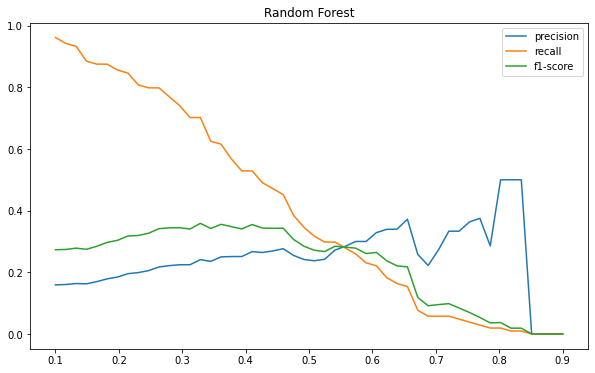

In [ ]:
# plotting the recall, precision and f1-score for different threshold of Random forest
plt.figure(figsize = (10,6))
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = precisionscore, label = 'precision')
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = recallscore, label = 'recall')
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = f1scores, label = 'f1-score')
plt.title('Random Forest')
plt.show()

In [ ]:
# predicting probability of each class by hyperparameter tuned Logistic Regression model
predicted_proba = lr2.predict_proba(x_test)

accuracy = []
f1scores = []
precisionscore = []
recallscore = []

# for loop for different value of threshold
for threshold in np.linspace(0.1,0.9,50):
  predicted_proba[:,1] >= threshold
  predictions = (predicted_proba [:,1] >= threshold).astype('int')    
  accuracy.append(accuracy_score(y_test,predictions))
  f1scores.append(f1_score(y_test,predictions))
  precisionscore.append(precision_score(y_test,predictions))
  recallscore.append(recall_score(y_test,predictions))

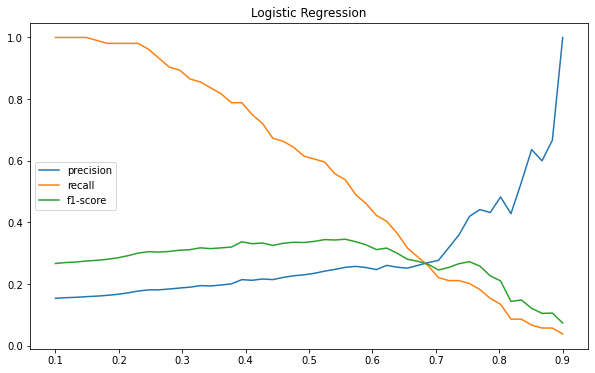

In [ ]:
# plotting the recall, precision and f1-score for different threshold of Logistic Regression
plt.figure(figsize = (10,6))
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = precisionscore, label = 'precision')
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = recallscore, label = 'recall')
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = f1scores, label = 'f1-score')
plt.title('Logistic Regression')
plt.show()

# **Conclusion**


*   Without Hyperparameter tuning all models are overfitting
*   F1 score didn't improved even afer hyper parameter tuning may be due to lack of specific relation between features


*   Logistic regression with hyperparameter tuning performed better than other models
*   Lower threshold value is prefered as it gives better recall 



